In [5]:
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

In [3]:
transform = transforms.ToTensor()

trainset = datasets.FashionMNIST('Fashion_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('Fashion_MNIST_data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

100.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/train-images-idx3-ubyte.gz


111.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz


100.0%

Extracting Fashion_MNIST_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz


159.1%

Extracting Fashion_MNIST_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [ ]:
class Network:
    def __init__(self, dropout=0.2):
        self.model = nn.Sequential(nn.Linear(784, 256),
                                   nn.ReLU(),
                                   nn.Dropout(p=dropout),
                                   nn.Linear(256, 64),
                                   nn.ReLU(),
                                   nn.Dropout(p=dropout),
                                   nn.Linear(64, 10),
                                   nn.LogSoftmax(dim=1))
        self.criterion = nn.NLLLoss()
        self.optim = optim.SGD(self.model.parameters(), lr=0.01)
        
    def train(self, trainloader, testloader, epochs=5):
        print('begin to train:')
        loss = {'train': [], 'test': []}
        for e in range(epochs):
            train_loss = self.train_epoch(trainloader)
            print(f"epoch {e}  loss: {train_loss}")
            test_loss, test_acc = self.test(testloader)
            print(f"Test  loss: {test_loss},   acc: {test_acc*100}%")
            loss['train'].append(train_loss)
            loss['test'].append(test_loss)
            
        return loss
            
    def test(self, dataloader):
        total_acc = 0
        loss = 0
        with torch.no_grad():
            self.model.eval()
            for images, labels in dataloader:
                images = images.view(images.shape[0], -1)
                output = self.model.forward(images)
                #print(output.shape)
                loss += self.criterion(output, labels)
                #print("loss", loss, loss.item())
                
                ps = torch.exp(output)
                #print("ps", ps)
                prob, pred = ps.topk(1, dim=1)
                #print(prob, pred)
                equals = pred == labels.view(*pred.shape)
                #print("equales", equals)
                total_acc += torch.mean(equals.type(torch.FloatTensor))
        
        return loss/len(dataloader), total_acc/len(dataloader)
                
    def train_epoch(self, trainloader):
        running_loss = 0
        for images, labels in trainloader:
            images = images.view(images.shape[0], -1)
            
            output = self.model.forward(images)
            # 计算loss
            loss = self.criterion(output, labels)
            # 反向传播，计算梯度
            self.optim.zero_grad()   # 这句要放前面
            loss.backward()
            # 更新权重
            self.optim.step()
            
            running_loss += loss.item()
        
        return running_loss/len(trainloader)
                
    def predict(self, image):
        image = image.view(1, -1)
        with torch.no_grad():
            logits = self.model.forward(image)
            
        ps = F.softmax(logits)
        return ps

begin to train:
epoch 0  loss: 1.372455621833232
Test  loss: 0.8320513963699341,   acc: 68.15287017822266%
epoch 1  loss: 0.7210824233827307
Test  loss: 0.6829768419265747,   acc: 75.22889709472656%
epoch 2  loss: 0.5994744172482602
Test  loss: 0.5819538235664368,   acc: 79.48845672607422%
epoch 3  loss: 0.5375637634158897
Test  loss: 0.5398673415184021,   acc: 81.0609130859375%
epoch 4  loss: 0.5040950770062933
Test  loss: 0.5158382058143616,   acc: 81.97651672363281%
epoch 5  loss: 0.48262056457335506
Test  loss: 0.5052385330200195,   acc: 82.12579345703125%
epoch 6  loss: 0.46594302600889065
Test  loss: 0.48491621017456055,   acc: 83.13097381591797%
epoch 7  loss: 0.4529502610090191
Test  loss: 0.5017426609992981,   acc: 82.31488800048828%
epoch 8  loss: 0.44150382267640853
Test  loss: 0.46246352791786194,   acc: 83.7380599975586%
epoch 9  loss: 0.4313263736808224
Test  loss: 0.4605514109134674,   acc: 83.7878189086914%
epoch 10  loss: 0.4222355438416192
Test  loss: 0.46479564905166

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:69: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


tensor(6)
tensor(1)
tensor(4)
tensor(6)


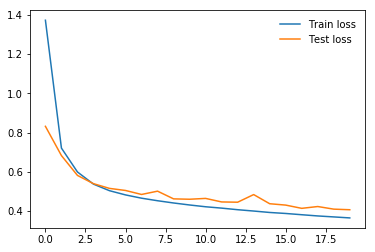

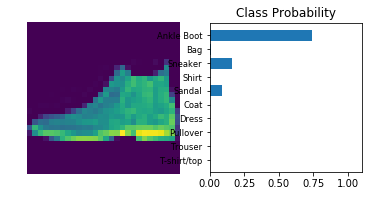

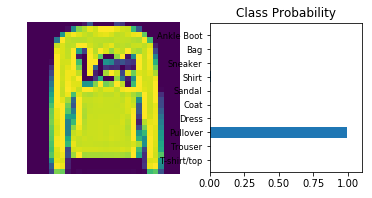

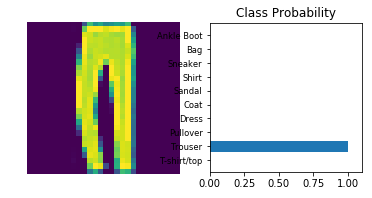

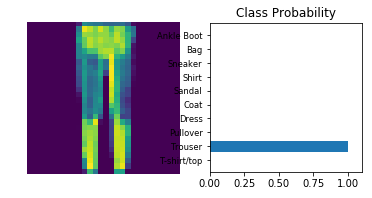

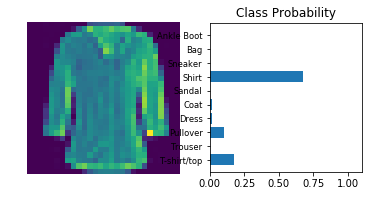

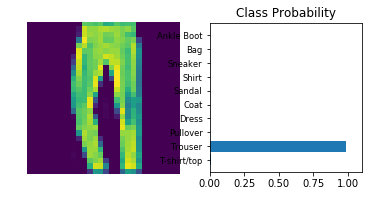

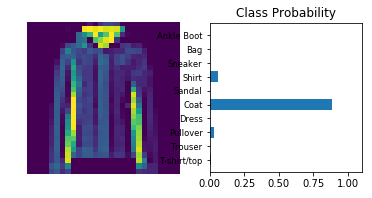

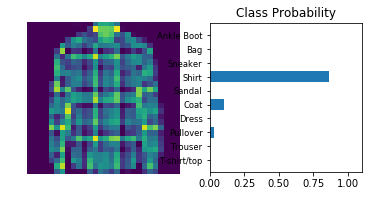

In [88]:
%matplotlib inline
import matplotlib.pyplot as plt

model = Network()
losses = model.train(trainloader, testloader, epochs=20)
plt.plot(losses['train'], label="Train loss")
plt.plot(losses['test'], label="Test loss")
plt.legend(frameon=False)

images, labels = next(iter(testloader))
for i in range(8):
    ps = model.predict(images[i])
    print(labels[i])
    view_classify(images[i].view(1, 28, 28), ps, version='Fashion')

begin to train:
epoch 0  loss: 1.5008765645881197
Test  loss: 0.9626648426055908,   acc: 62.579620361328125%
epoch 1  loss: 0.8379719322805466
Test  loss: 0.7818666100502014,   acc: 71.39729309082031%
epoch 2  loss: 0.710835758334538
Test  loss: 0.6918752193450928,   acc: 75.32842254638672%
epoch 3  loss: 0.6374675824062657
Test  loss: 0.63836669921875,   acc: 77.3686294555664%
epoch 4  loss: 0.5897045970471428
Test  loss: 0.5963876843452454,   acc: 79.0505599975586%
epoch 5  loss: 0.5545917239461118
Test  loss: 0.5586530566215515,   acc: 80.71257781982422%
epoch 6  loss: 0.5265296027064323
Test  loss: 0.5316576361656189,   acc: 81.39928436279297%
epoch 7  loss: 0.5059145924760334
Test  loss: 0.5252320766448975,   acc: 81.87699127197266%
epoch 8  loss: 0.48957378228208914
Test  loss: 0.5089657306671143,   acc: 82.13574981689453%
epoch 9  loss: 0.47478613376553885
Test  loss: 0.49762439727783203,   acc: 82.18550872802734%
epoch 10  loss: 0.4602393226932361
Test  loss: 0.4856665134429931

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:71: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


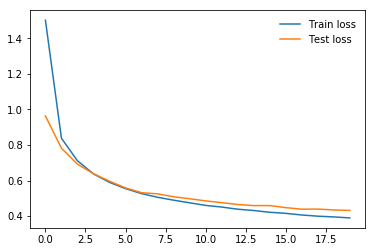

In [93]:
model = Network()
losses = model.train(trainloader, testloader, epochs=20)
plt.plot(losses['train'], label="Train loss")
plt.plot(losses['test'], label="Test loss")
plt.legend(frameon=False)

images, labels = next(iter(testloader))
for i in range(8):
    ps = model.predict(images[i])
    print(labels[i])